# Capstone - Nanodegree Udacity Engenheiro de Machine Learning

## Previsão de preço de licitação da matrícula de Xangai

## Inicios das implementações

### Leitura das bibliotecas

In [2]:
# importação do pandas para trabalhar com calcúlos no modelo
import numpy as np

# importação do pandas para realizar a analisse dos dados
import pandas as pd

# biblioteca do panda com o objetivo de ler CSV´s
from pandas import read_csv
from pandas.core import datetools

# bilioteca do para manpulação de variaveis de hora
import datetime

# bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.pylab import rcParams

import warnings
import itertools

# gráficos gerados sejam mostrados no notebook e não em uma nova janela
%matplotlib inline

# importação da bilioteca relativedelt para trabalhar com mamipulação de datas
from dateutil.relativedelta import relativedelta

# importação da função para trabalhar com o statsmodels no modelo de time series forecasting
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from subprocess import check_output

# Limpeza e analise de dados

In [3]:
# Fazer a leitura do dataset
data_test = pd.read_csv('license_plates_acution_data.csv')

In [4]:
# Exibir os 5 primeiros resultados do dataset
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,0,2002.1,14735,13600,3718,1400
1,1,2002.2,14057,13100,4590,1800
2,2,2002.3,14662,14300,5190,2000
3,3,2002.4,16334,16000,4806,2300
4,4,2002.5,18357,17800,4665,2350


In [5]:
# remover as colunas que não serão usadas 
data_test.drop(['Unnamed: 0'], axis=1, inplace = True)
data_test.head()

,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,2002.1,14735,13600,3718,1400
1,2002.2,14057,13100,4590,1800
2,2002.3,14662,14300,5190,2000
3,2002.4,16334,16000,4806,2300
4,2002.5,18357,17800,4665,2350


In [6]:
# alterar os nomes das colunas
data_test.columns = ['Data', 'Preço Medio', 'Preço Minimo', 'Numero Cidadões', 'Numero Placas']
data_test.head()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
0,2002.1,14735,13600,3718,1400
1,2002.2,14057,13100,4590,1800
2,2002.3,14662,14300,5190,2000
3,2002.4,16334,16000,4806,2300
4,2002.5,18357,17800,4665,2350


In [7]:
# print the column labels in the dataframe
for i, v in enumerate(data_test.columns):
    print(i, v)

0 Data
1 Preço Medio
2 Preço Minimo
3 Numero Cidadões
4 Numero Placas


In [8]:
# isto retorna uma tupla com as mesmas dimensões do dataframe
data_test.shape

(189, 5)

In [9]:
# isto retorna os tipos de dados das colunas
data_test.dtypes

Data               float64
Preço Medio          int64
Preço Minimo         int64
Numero Cidadões      int64
Numero Placas        int64
dtype: object

In [10]:
data_test.tail()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
184,2017.6,89532,89400,244349,10312
185,2017.7,92250,92200,269189,10325
186,2017.8,91629,91600,256083,10558
187,2017.9,91415,91300,250566,12413
188,2017.1,93540,93500,244868,11388


In [11]:
print(data_test)

        Data  Preço Medio  Preço Minimo  Numero Cidadões  Numero Placas
0    2002.10        14735         13600             3718           1400
1    2002.20        14057         13100             4590           1800
2    2002.30        14662         14300             5190           2000
3    2002.40        16334         16000             4806           2300
4    2002.50        18357         17800             4665           2350
5    2002.60        20178         19600             4502           2800
6    2002.70        20904         19800             3774           3000
7    2002.80        21601         21000             4640           3000
8    2002.90        24040         23600             4393           3200
9    2002.10        27040         26400             4661           3200
10   2002.11        31721         30800             4021           3200
11   2002.12        27848           100             3525           3600
12   2003.10        24267         18800             9442        

In [12]:
# embora o tipo de dados da coluna 'diagnosis' pareça ser 'object', 
# uma investigação mais profunda revela que se trata de uma string
type(data_test['Preço Medio'][0])

numpy.int64

In [13]:
# isto retorna o número de valores únicos em cada coluna
data_test.nunique()

Data               175
Preço Medio        189
Preço Minimo       159
Numero Cidadões    189
Numero Placas       85
dtype: int64

In [14]:
# isto retorna estatísticas descritivas úteis para cada coluna de dados
data_test.describe()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,2009.814233,51632.867725,50431.216931,56142.423280,7336.111111
std,4.612254,22548.372228,23574.450403,78988.734651,2468.294304
min,2002.100000,14057.000000,100.000000,3525.000000,1400.000000
25%,2005.900000,34684.000000,33100.000000,10170.000000,5690.000000
50%,2009.900000,42262.000000,41900.000000,18575.000000,7500.000000
75%,2013.800000,74113.000000,74000.000000,41946.000000,9000.000000
max,2017.900000,93540.000000,93500.000000,277889.000000,16000.000000


In [15]:
# isso também se aplica ao comando `.tail()` que retorna as últimas linhas do dataframe
data_test.tail(2)

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
187,2017.9,91415,91300,250566,12413
188,2017.1,93540,93500,244868,11388


In [16]:
# isto exibe um resumo conciso do dataframe,
# incluindo o número de valores não-nulos em cada coluna
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
Data               189 non-null float64
Preço Medio        189 non-null int64
Preço Minimo       189 non-null int64
Numero Cidadões    189 non-null int64
Numero Placas      189 non-null int64
dtypes: float64(1), int64(4)
memory usage: 7.5 KB


In [17]:
# analisar os 5 primeiros registros do dataset
data_test.head()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
0,2002.1,14735,13600,3718,1400
1,2002.2,14057,13100,4590,1800
2,2002.3,14662,14300,5190,2000
3,2002.4,16334,16000,4806,2300
4,2002.5,18357,17800,4665,2350


In [18]:
# Soma dos valores de um DataFrame
data_test.sum()

Data                 379854.89
Preço Medio         9758612.00
Preço Minimo        9531500.00
Numero Cidadões    10610918.00
Numero Placas       1386525.00
dtype: float64

In [19]:
# Menor valor de um DataFrame
data_test.min()

Data                2002.1
Preço Medio        14057.0
Preço Minimo         100.0
Numero Cidadões     3525.0
Numero Placas       1400.0
dtype: float64

In [20]:
# Maior valor
data_test.max()

Data                 2017.9
Preço Medio         93540.0
Preço Minimo        93500.0
Numero Cidadões    277889.0
Numero Placas       16000.0
dtype: float64

In [21]:
#Resumo estatístico do DataFrame, com quartis, mediana, etc.
data_test.describe()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,2009.814233,51632.867725,50431.216931,56142.423280,7336.111111
std,4.612254,22548.372228,23574.450403,78988.734651,2468.294304
min,2002.100000,14057.000000,100.000000,3525.000000,1400.000000
25%,2005.900000,34684.000000,33100.000000,10170.000000,5690.000000
50%,2009.900000,42262.000000,41900.000000,18575.000000,7500.000000
75%,2013.800000,74113.000000,74000.000000,41946.000000,9000.000000
max,2017.900000,93540.000000,93500.000000,277889.000000,16000.000000


In [22]:
# função para ver se existem itens duplicados
data_test.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
Length: 189, dtype: bool

In [23]:
# função para fazer a contagem dos dados duplicados, não se aplica aqui
sum(data_test.duplicated())

0

In [24]:
# checar para ver se o preço minimo possui muitos valores repetidos
data_test['Preço Minimo'].value_counts()

39600    3
29300    3
73800    3
74000    3
38500    3
51000    2
43000    2
73600    2
38300    2
37800    2
53800    2
28500    2
35000    2
74600    2
21800    2
37000    2
44200    2
36900    2
28800    2
88300    2
83100    2
73500    2
17800    2
33900    2
39800    2
30800    1
50900    1
76300    1
33100    1
82300    1
        ..
41100    1
85000    1
90800    1
26500    1
32600    1
92200    1
16000    1
38000    1
34300    1
37500    1
8100     1
84600    1
34200    1
88600    1
31300    1
39100    1
75000    1
10400    1
37300    1
41000    1
35200    1
41900    1
74400    1
68900    1
26600    1
46500    1
80000    1
83200    1
36000    1
38400    1
Name: Preço Minimo, Length: 159, dtype: int64

In [26]:
# verificar novamente os dados de data_test
data_test.head()

,Data,Preço Medio,Preço Minimo,Numero Cidadões,Numero Placas
0,2002.1,14735,13600,3718,1400
1,2002.2,14057,13100,4590,1800
2,2002.3,14662,14300,5190,2000
3,2002.4,16334,16000,4806,2300
4,2002.5,18357,17800,4665,2350


### 05 principais valores medios

In [27]:
data_test['Preço Minimo'].value_counts().head(5)

39600    3
29300    3
73800    3
74000    3
38500    3
Name: Preço Minimo, dtype: int64

### 05 principais preços minimos

In [28]:
data_test['Preço Medio'].value_counts().head(5)

28927    1
73872    1
80803    1
47700    1
44627    1
Name: Preço Medio, dtype: int64

### Averiguar qual o tipo de dados

In [29]:
type(data_test['Data'].iloc[1])

numpy.float64

### Análise Exploratória dos Dados

In [30]:
# ler os dados do dadaset e definir o formato das colunas
df = pd.read_csv("license_plates_acution_data.csv",usecols=["Date", "num_bidder", "num_plates", "lowest_deal_price", 
                 "avg_deal_price"], dtype={"Date":"str", "num_bidder":"float", "num_plates":"float", 
                 "lowest_deal_price":"float", "avg_deal_price":"float"})
df.head()

,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,2002.1,14735.0,13600.0,3718.0,1400.0
1,2002.2,14057.0,13100.0,4590.0,1800.0
2,2002.3,14662.0,14300.0,5190.0,2000.0
3,2002.4,16334.0,16000.0,4806.0,2300.0
4,2002.5,18357.0,17800.0,4665.0,2350.0


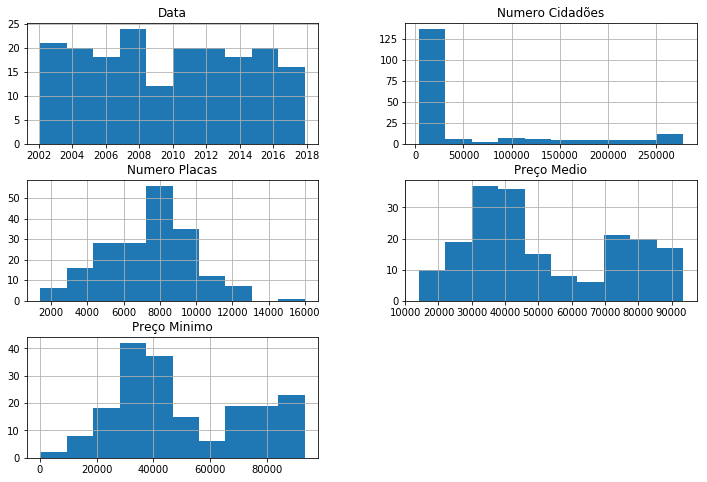

In [25]:
# plotar histograma de todas as series temproais do dataset
data_test.hist(figsize=(12, 8));

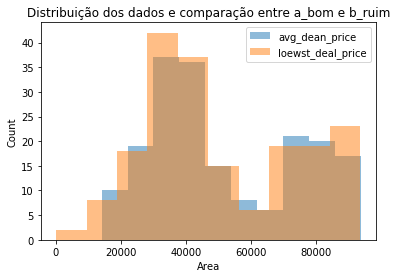

In [31]:
# plotar gráfico de histograma para postar a e visualizar a diferença de preço minimo e preço medio
fig, ax = plt.subplots()
ax.hist(data_test['Preço Medio'], alpha=0.5, label='avg_dean_price')
ax.hist(data_test['Preço Minimo'], alpha=0.5, label='loewst_deal_price')
ax.set_title('Distribuição dos dados e comparação entre a_bom e b_ruim')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

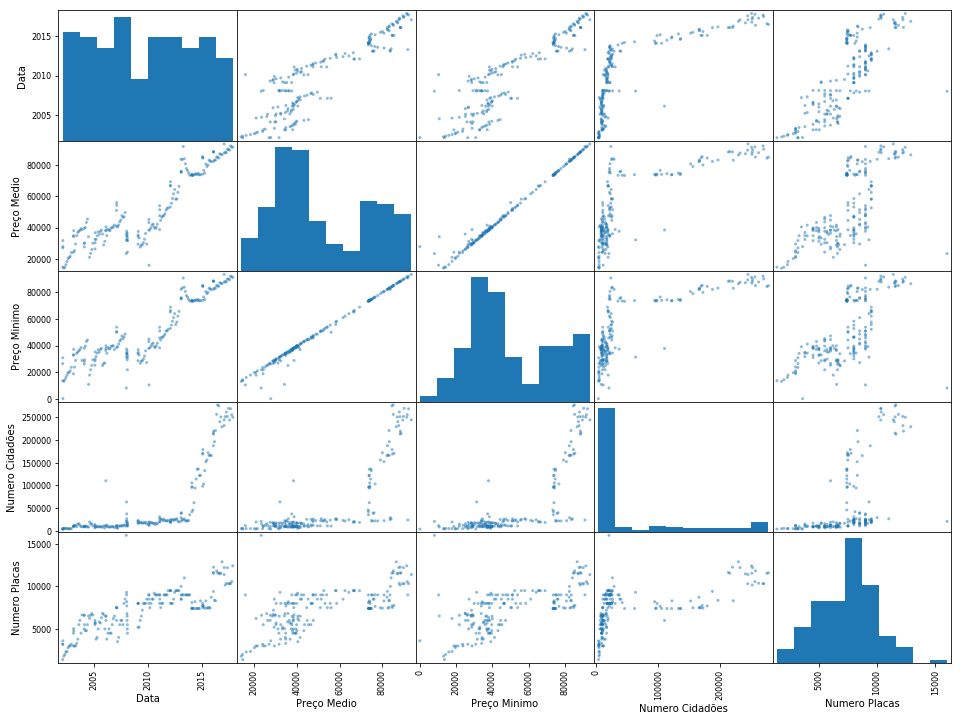

In [32]:
# plotagem de uma scatter matrix para analisar todas as variaveis do dataset
pd.plotting.scatter_matrix(data_test, figsize=(16, 12));

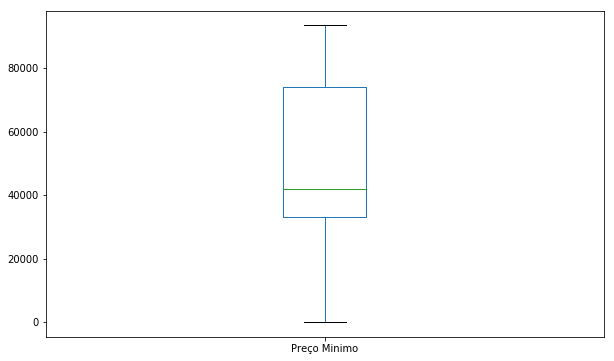

In [33]:
# plotar boxplot para checar os residuos do preço minimo
data_test['Preço Minimo'].plot(kind='box', figsize=(10, 6));

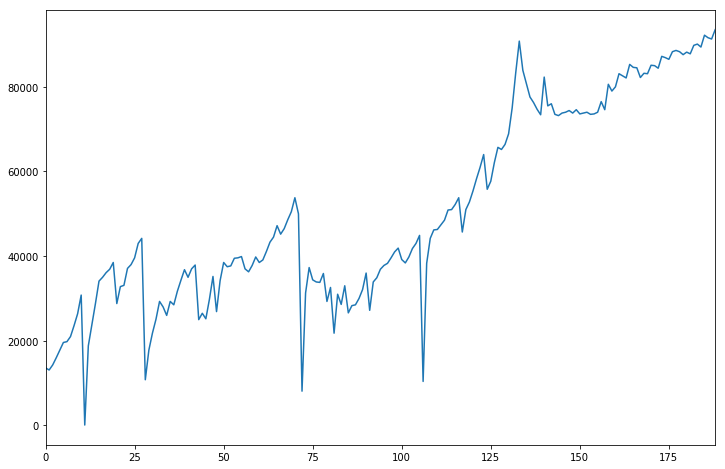

In [36]:
# plotar preço minimo como gráfico de linha para analisar a serie temporal
data_test['Preço Minimo'].plot(kind='line', figsize=(12, 8));

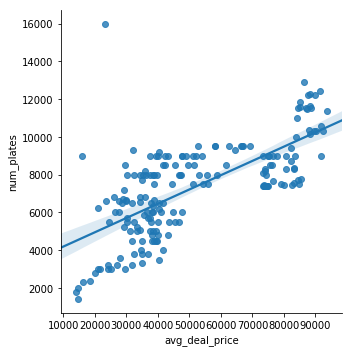

In [41]:
# plot para mostrar a linha da regressão linear
sns.lmplot(x='avg_deal_price', y='num_plates', data=df)

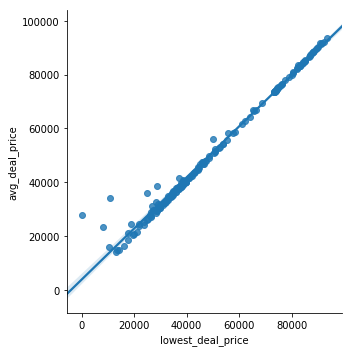

In [42]:
# plot para desenhar a linha de regressão linear entre preço minimo e preço medio
sns.lmplot(x='lowest_deal_price', y='avg_deal_price', data=df)

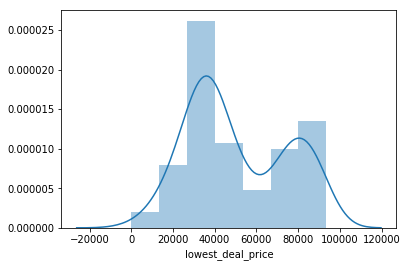

In [43]:
# plotagem da linha da regressão linear do modelo
sns.distplot(df['lowest_deal_price'])

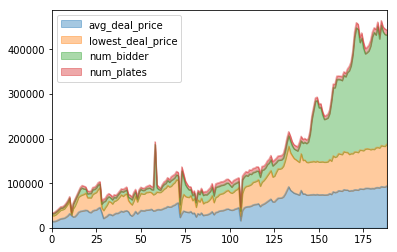

In [46]:
# plotar todas as series temporais do data frama
df.plot.area(alpha=0.4)

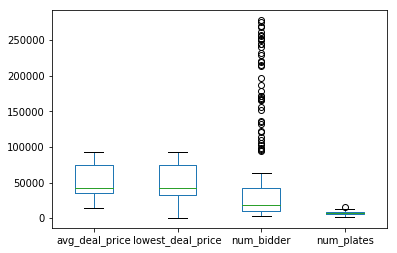

In [48]:
# boxplot para visualizar os residuos do modelo
df.plot.box()

/home/marcus/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


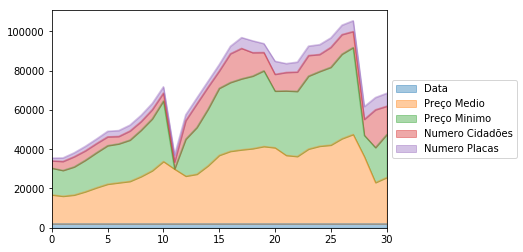

In [49]:
f = plt.figure()
data_test.ix[0:30].plot.area(alpha=0.4,ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

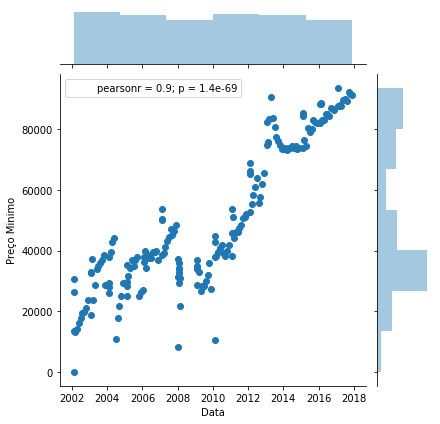

In [50]:
sns.jointplot(x="Data", y="Preço Minimo", data=data_test, kind='scatter')

Text(0.5,0,'Preço Minimo')

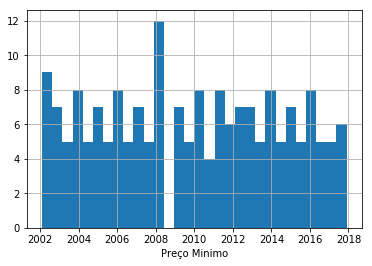

In [52]:
# modificação do estilo do seaborn e impressão do histograma de preço minimo
data_test['Data'].hist(bins=30)
plt.xlabel('Preço Minimo')

## Previsão

     O termo “previsão”, assim como “predição”, pode ser definido como “um processo metodológico para a determinação de dados futuros baseado em modelos estatísticos, matemáticos ou econométricos ou ainda em modelos subjetivos apoiados em uma metodologia de trabalho clara e previamente definida” (MORETTIN; TOLOI, 2004).

# Regressão linear

Codigos criados com base nos estudos das bibliotecas para se traballhar com algoritimos de regressão linear e também com base nos aprendizados da Udacity e em cursos paralelos. Demais referencias que me levaram a esse aprendizado se encontram na referência bibliografica.

In [75]:
# fazer a leitura do dataset com o csv
shangaipred = pd.read_csv("license_plates_acution_data.csv",usecols=["Date", "num_bidder", "num_plates", "lowest_deal_price", 
                 "avg_deal_price"], dtype={"Date":"str", "num_bidder":"float", "num_plates":"float", 
                 "lowest_deal_price":"float", "avg_de}al_price":"float"})

# ver informações sobre o tipo de dados de todas as colunas do modelo
shangaipred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
Date                 189 non-null object
avg_deal_price       189 non-null int64
lowest_deal_price    189 non-null float64
num_bidder           189 non-null float64
num_plates           189 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.5+ KB


In [76]:
# converter coluna date para uma coluna datetime, caso essa converssão não seja feita o modelo vai apresentar problemas
shangaipred["Date"] = pd.to_datetime(shangaipred["Date"])
shangaipred.set_index("Date",inplace=True)
shangaipred.head()

,avg_deal_price,lowest_deal_price,num_bidder,num_plates
Date,,,,
2002-01-01,14735,13600.0,3718.0,1400.0
2002-02-01,14057,13100.0,4590.0,1800.0
2002-03-01,14662,14300.0,5190.0,2000.0
2002-04-01,16334,16000.0,4806.0,2300.0
2002-05-01,18357,17800.0,4665.0,2350.0


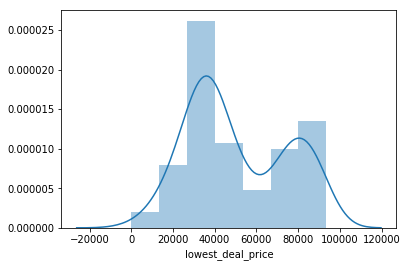

In [77]:
# plotar a curva normal no histograma do preço minimo
sns.distplot(shangaipred['lowest_deal_price'])

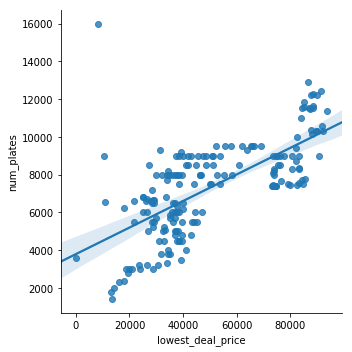

In [78]:
# traçar e plotar a linha da regressão linear entre preço minimo e numero de placas
sns.lmplot(x='lowest_deal_price', y='num_plates', data=shangaipred)

## Modelo Regressão LInear

In [79]:
# importar a biblioteca train_test_split
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [80]:
# definir o X e o y do modelo
X = shangaipred[['avg_deal_price', 'num_bidder', 'num_plates']]
y = shangaipred['lowest_deal_price']

tscv = TimeSeriesSplit(n_splits=12)
print((tscv))

TimeSeriesSplit(max_train_size=None, n_splits=12)


In [81]:
model = xgb.XGBRegressor()
param_search = {'max_depth' : [3, 5]}

In [82]:
my_cv = TimeSeriesSplit(n_splits=2).split(X)
gsearch = GridSearchCV(estimator=model, cv=my_cv,
                        param_grid=param_search)
gsearch.fit(X, y)

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7f9149be5af0>,
       error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [83]:
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X, X
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] TEST: [21 22 23 24 25 26 27 28 29 30 31 32 33 34]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34] TEST: [35 36 37 38 39 40 41 42 43 44 45 46 47 48]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] TEST: [49 50 51 52 53 54 55 56 57 58 59 60 61 62]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62] TEST: [63 64 65 66 67 68 69 70 71 72 73 74 75 76]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76] TEST: [77 78 

In [84]:
X_train, X_test = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
y_train, y_test = y[:len(train_index)], y[len(train_index): (len(train_index)+len(test_index))]

In [85]:
# importar a biblioteca para utilizar a regressão linear
from sklearn.linear_model import LinearRegression

# criando a variavel lm que vai armazenar o resultado da regressão linear
lm = LinearRegression()

# chamando a função lm.fit de X_train e y_train
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
# verificar o tamanho da variavel X_train
X_train.shape[0]

175

### Avaliando o Modelo

In [87]:
# imprimir o resultado de lm.intercept_ função da biblioteca de regressão linear
print(lm.intercept_)

-2252.66585117


In [88]:
# imprimir o resultado de lm.coef_ função da biblioteca de regressão linear
print(lm.coef_)

[  1.05493475e+00   5.12246910e-04  -2.46541042e-01]


In [89]:
# criado a variavel coefs para ver o resultado do lm.coef_ em colunas após isso imprimir o dataset
coefs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coefs

,Coefs
avg_deal_price,1.054935
num_bidder,0.000512
num_plates,-0.246541


In [90]:
# criar previsões com base no lm.predict da variavel X_teste e imprimir o resultado
predict = lm.predict(X_test)
predict

array([ 85963.36907322,  88204.47729475,  88546.1713728 ,  88106.0192567 ,
        87356.68172778,  88459.6002118 ,  88074.01224361,  89655.63278172,
        90507.03302796,  89780.58780959,  92657.41963444,  91938.14758524,
        91252.2318509 ,  93743.75397516])

Text(0,0.5,'Predicted Y')

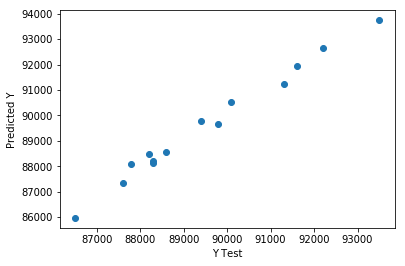

In [91]:
# criando plot para ver a diferença dos itens previstos e dos itens de teste
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Verificando a acuracia do modelo

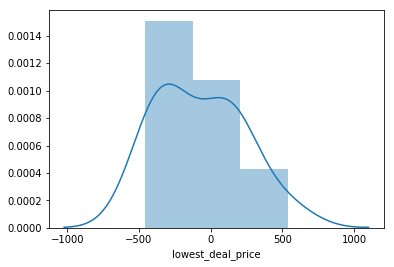

In [92]:
# criado plot para ver a diferença entre y_test e predict
sns.distplot((y_test-predict))

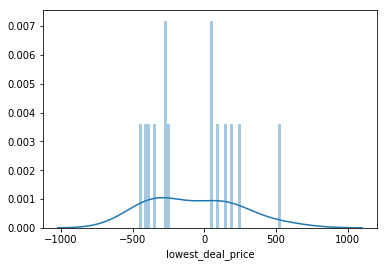

In [93]:
sns.distplot((y_test-predict), bins=50);

In [94]:
# importar a biblioteca metrics para ver a qualidade do modelo
from sklearn import metrics

# imprimir as funções da biblioteca metrics 
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 262.569366425
MSE: 89710.0941515
RMSE: 299.516433859


# Time Series Forecasting & ARIMA Model

Para mostrar o objetivo do trabalho que é comprovar a melhor eficacia de se trabalhar esse problema com as bibliotecas de times series usei alguns exemplos para entender de verdade como se trabalhar com series temporais. Assim como também utilizei conhecimento aprendido nos cursos da Udacity, cursos paralelos e demais referencias que você vai encontrar no referêncial teôrico. Sendo que peguei o que considerei de melhor de cada referêncial e que funcionou para o modelo criado abaixo.

Cito abaixo todas as fontes que utilisei diretamente e indiretamente para chegar aos codigos abaixo. Como acredito que na implementação da regressão linear eu atinji os objetivos do projeto, vou realizar essa implementação para termos como base de comparação com os outros modelos. Eu fiz um apanhado de todas as referencias diretas que utilizei aqui na parte de Time Series Forescasting, em alguns momentos não consegui fugir do codigo original que usei como referencia, porêm tentei colocar meus aprendizados após um benchmark entre as aplicações citadas nas referencias abaixo e tentei evoluir o modelo do Kernel que encontrei no Kaggle[2].

Indiretamente utilizei codigos do repositório Seasonal_ARIMA_MODEL_Portland_transit que são como um guia para implementação de modelos Arima[3], assim como um post do Analyticsvidhya que também consiste um guia para se trabalhar com time series forecasting [4]. Outras fontes de referencias foram, um post com exemplo de aplicação de modelos de time series do Ucanalytics [5], consultas ao Python Data Science Handbook [6], e também consulta a outros Kernels do Kaggle [7].

[1] - Site do Mário Filho. Acesso em: http://mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/

[2] - Kernel do Kaggle com analise de dados. Acesso em: https://www.kaggle.com/bazingasu/data-exploration

[3] - Repositório do GitHub.Acesso em: https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb

[4] - Post do Blog Analyticsvidhya. Acesso em: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

[5] - Post do Blog Ucanalytics. Acesso em:http://ucanalytics.com/blogs/wp-content/uploads/2017/08/ARIMA-TimeSeries-Analysis-of-Tractor-Sales.html

[6] - Repositório do GithHub do Data Science Handbook. Acesso em: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb

[7] - Repositório do Kaggle com analise de dados: https://www.kaggle.com/kentata/time-series-data-exploration

In [131]:
# ler os dados do dadaset e definir o formato das colunas
data = pd.read_csv("license_plates_acution_data.csv",usecols=["Date", "num_bidder", "num_plates", "lowest_deal_price", 
                 "avg_deal_price"], dtype={"Date":"str", "num_bidder":"float", "num_plates":"float", 
                 "lowest_deal_price":"float", "avg_de}al_price":"float"})

# ler as 5 primeiras colunas do dataset
data.head()

,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,2002.1,14735,13600.0,3718.0,1400.0
1,2002.2,14057,13100.0,4590.0,1800.0
2,2002.3,14662,14300.0,5190.0,2000.0
3,2002.4,16334,16000.0,4806.0,2300.0
4,2002.5,18357,17800.0,4665.0,2350.0


In [132]:
# converter coluna date para uma coluna datetime, caso essa converssão não seja feita o modelo vai apresentar problemas
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)
data.head()

,avg_deal_price,lowest_deal_price,num_bidder,num_plates
Date,,,,
2002-01-01,14735,13600.0,3718.0,1400.0
2002-02-01,14057,13100.0,4590.0,1800.0
2002-03-01,14662,14300.0,5190.0,2000.0
2002-04-01,16334,16000.0,4806.0,2300.0
2002-05-01,18357,17800.0,4665.0,2350.0


In [133]:
# checando valores que faltam no dataset
# aqui podemos observar que em 2008 existe um mês faltante assim como em 2017 existem dois meses faltantes
for y in range(2002,2018):
    print(y,": ", data[str(y)].shape)

2002 :  (12, 4)
2003 :  (12, 4)
2004 :  (12, 4)
2005 :  (12, 4)
2006 :  (12, 4)
2007 :  (12, 4)
2008 :  (11, 4)
2009 :  (12, 4)
2010 :  (12, 4)
2011 :  (12, 4)
2012 :  (12, 4)
2013 :  (12, 4)
2014 :  (12, 4)
2015 :  (12, 4)
2016 :  (12, 4)
2017 :  (10, 4)


In [134]:
# como em fevereiro temos um mês faltando precisamos criar a variaavel feb_2008 que vai armazenar em fevereiro resultados
# da média dos outros resultados de 2008, com objetivo de completar os valores faltantes
fevereiro_2008 = pd.DataFrame([data["2008"].mean(axis=0)],index=[pd.to_datetime("2008-02-01")],columns=data.columns)
data = pd.concat([data,fevereiro_2008])
data.sort_index(inplace=True)

# impressão dos resultados dos registros de 2008 para ver se está tudo certo
data["2008"]

,avg_deal_price,lowest_deal_price,num_bidder,num_plates
2008-01-01,23370.000000,8100.000000,20539.000000,16000.000000
2008-02-01,32379.181818,29945.454545,22616.636364,7681.818182
2008-03-01,32169.000000,31300.000000,63534.000000,9300.000000
2008-04-01,37659.000000,37300.000000,37072.000000,9000.000000
2008-05-01,36047.000000,34400.000000,26341.000000,8200.000000
2008-06-01,34947.000000,33900.000000,21208.000000,7700.000000
2008-07-01,34491.000000,33800.000000,16783.000000,6800.000000
2008-08-01,36460.000000,35900.000000,13451.000000,6000.000000
2008-09-01,31788.000000,29300.000000,11002.000000,6500.000000
2008-10-01,33224.000000,32600.000000,11882.000000,5000.000000


Text(0.5,1,'Gráfico do preço minimo')

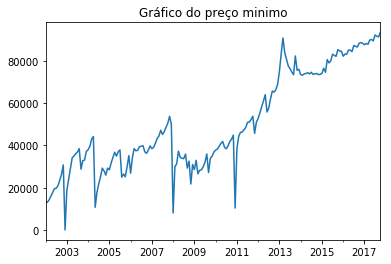

In [135]:
# plot a cooluna preço minimo para observar a serie temporal
data["lowest_deal_price"].plot()
plt.title("Gráfico do preço minimo")

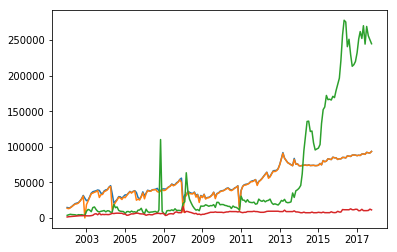

In [136]:
# plot de todas as series temporais do modelo para observar como as series temporais se relacionam
plt.plot(data)

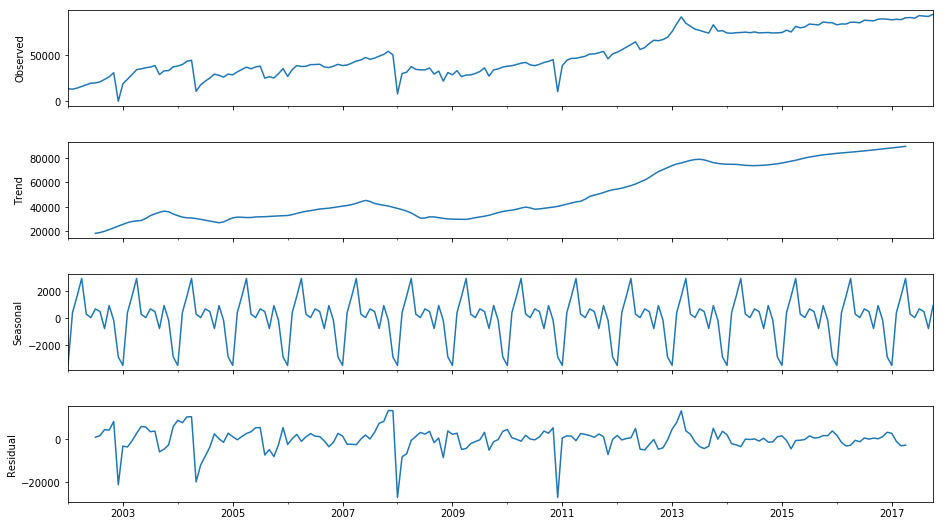

In [137]:
# Uma das formas de se trabalhar entendendo series temporais e atravez da decomposição, que vai nos retornar 4 plots com
# a serie temporal original, a tendência do modelo, sazonalidade e os residuos

# aqui importamos a função seasonal_decompose que ira decompor a serie temporal, utilizando freq=12 para definir o periodo anual
decomposition = seasonal_decompose(data['lowest_deal_price'], freq=12) 

# criação das variaveis tendencia, sazonalidade e residuo
tendencia = decomposition.trend 
sazonalidade = decomposition.seasonal 
residuo = decomposition.resid

# plotar a serie temporal decomposta
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [138]:
# importar a biblioteca adfuller
from statsmodels.tsa.stattools import adfuller

#  Construir uma função para testar a serie estacionaria
# # criação de função para testar e entender a média do rolamento e o desvio padrão do preço minimo
def test_stationarity(timeseries):
    
    # Determinar as estatisticas de rolagem do modelo
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    # Plotar as rolagens estatisticas do modelo
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolagem Media')
    std = plt.plot(rolstd, color='black', label = 'Rolagem Std')
    plt.legend(loc='best')
    plt.title('Média do Rolamento e Desvio Padrão')
    plt.show()
    
    # imprimir a performance do teste de Dickey Fuller
    print('Resultados do teste Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Estatistico','p-value','#Lags Usados','Número de Observações Usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valores Criticos (%s)'%key] = value
    print(dfoutput)

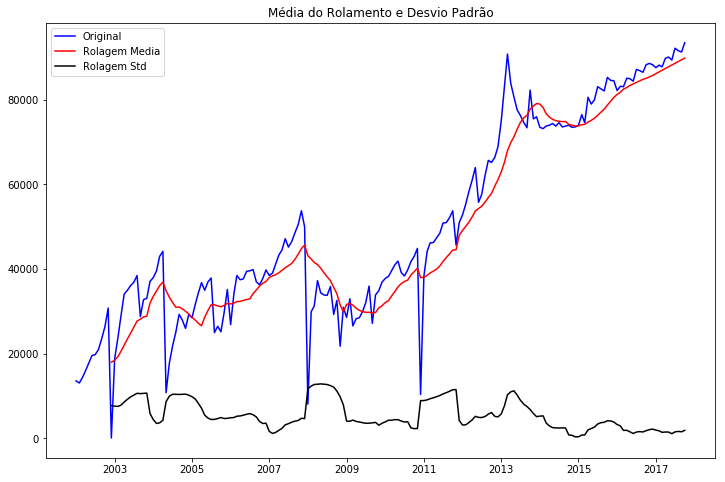

Resultados do teste Dickey-Fuller:
Test Estatistico                 -0.819643
p-value                           0.813284
#Lags Usados                      3.000000
Número de Observações Usadas    186.000000
Valores Criticos (1%)            -3.466005
Valores Criticos (5%)            -2.877208
Valores Criticos (10%)           -2.575122
dtype: float64


In [139]:
# criação da variavel data_price para armazenar os resultados da coluna preço medio
data_price = data['lowest_deal_price']

# aplicação da função test_stationary na variavel data_price para gerar o teste de dickey fuller
test_stationarity(data_price)

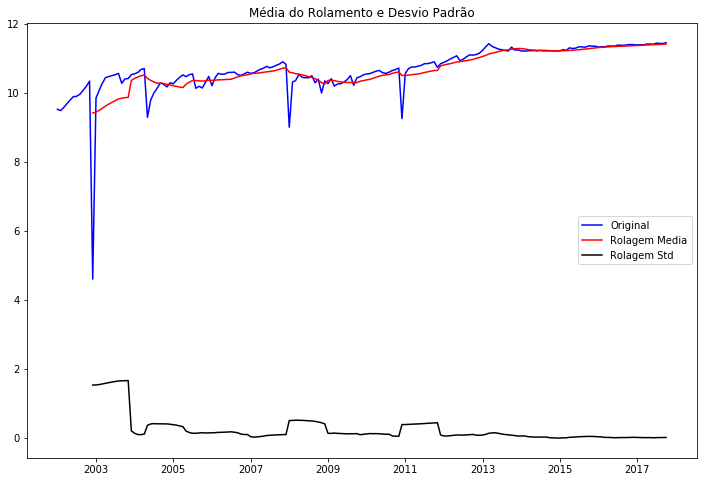

Resultados do teste Dickey-Fuller:
Test Estatistico                 -3.010920
p-value                           0.033887
#Lags Usados                      3.000000
Número de Observações Usadas    186.000000
Valores Criticos (1%)            -3.466005
Valores Criticos (5%)            -2.877208
Valores Criticos (10%)           -2.575122
dtype: float64


In [140]:
# criação da variavel data_price_log para calcular o log da variavel data_price
data_price_log = data_price.apply(lambda x: np.log(x))  

# aplicação da função test_stationary na variavel data_price_log para plotar gerar o teste de dickey fuller
test_stationarity(data_price_log)

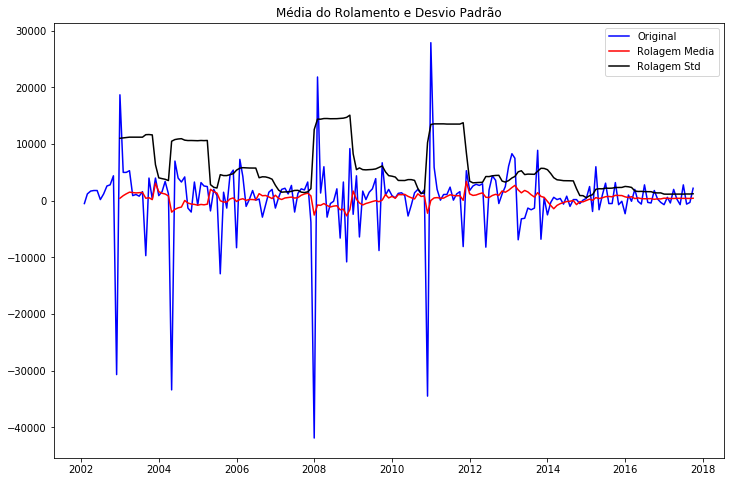

Resultados do teste Dickey-Fuller:
Test Estatistico               -9.747120e+00
p-value                         8.199420e-17
#Lags Usados                    3.000000e+00
Número de Observações Usadas    1.850000e+02
Valores Criticos (1%)          -3.466201e+00
Valores Criticos (5%)          -2.877293e+00
Valores Criticos (10%)         -2.575168e+00
dtype: float64


In [141]:
# criação da variavel data_price_log para calcular o log da variavel data_price
data_first_difference = data_price - data_price.shift(1)

test_stationarity(data_first_difference.dropna(inplace=False))

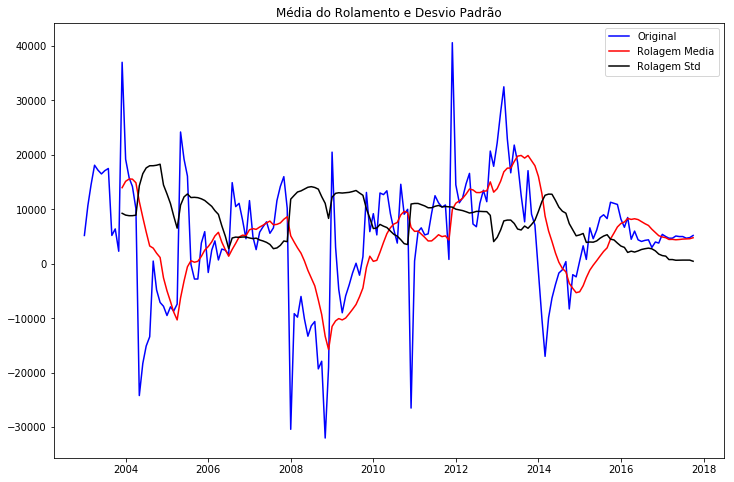

Resultados do teste Dickey-Fuller:
Test Estatistico                 -3.035024
p-value                           0.031751
#Lags Usados                     13.000000
Número de Observações Usadas    164.000000
Valores Criticos (1%)            -3.470866
Valores Criticos (5%)            -2.879330
Valores Criticos (10%)           -2.576255
dtype: float64


In [142]:
data_seasonal_difference = data_price - data_price.shift(12)
test_stationarity(data_seasonal_difference.dropna(inplace=False))

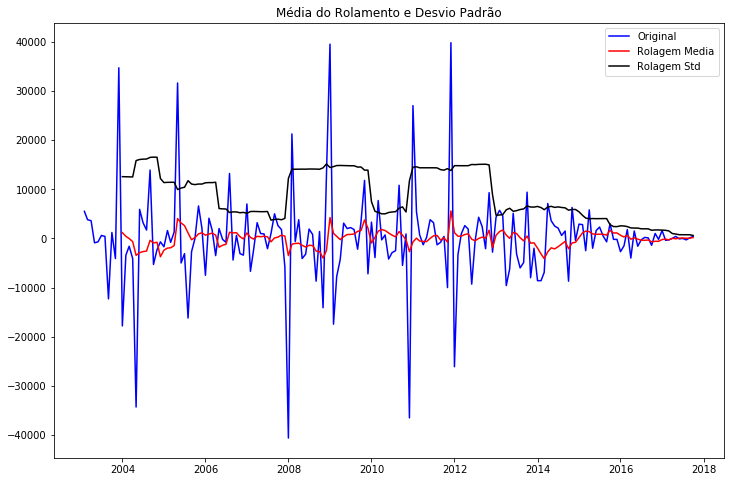

Resultados do teste Dickey-Fuller:
Test Estatistico                 -5.278592
p-value                           0.000006
#Lags Usados                     12.000000
Número de Observações Usadas    164.000000
Valores Criticos (1%)            -3.470866
Valores Criticos (5%)            -2.879330
Valores Criticos (10%)           -2.576255
dtype: float64


In [143]:
data_seasonal_first_difference = data_first_difference - data_first_difference.shift(12)
test_stationarity(data_seasonal_first_difference.dropna(inplace=False))

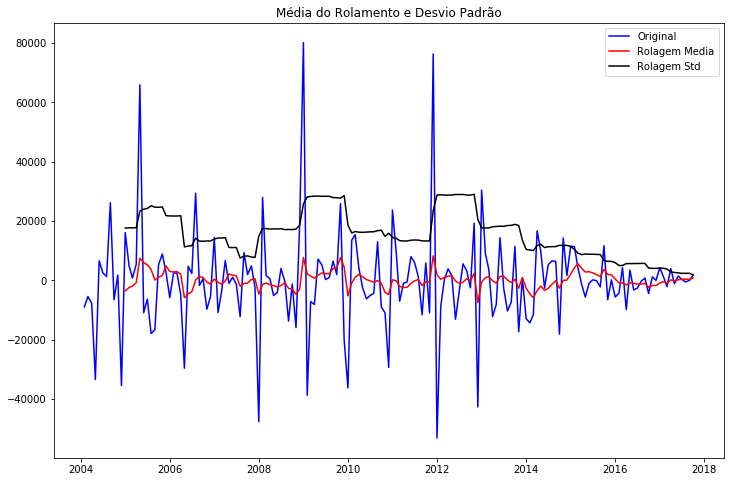

Resultados do teste Dickey-Fuller:
Test Estatistico               -5.755368e+00
p-value                         5.836636e-07
#Lags Usados                    1.200000e+01
Número de Observações Usadas    1.520000e+02
Valores Criticos (1%)          -3.474121e+00
Valores Criticos (5%)          -2.880750e+00
Valores Criticos (10%)         -2.577013e+00
dtype: float64


In [144]:
data_log_seasonal_first_difference = data_seasonal_first_difference - data_seasonal_first_difference.shift(12)  
test_stationarity(data_log_seasonal_first_difference.dropna(inplace=False))

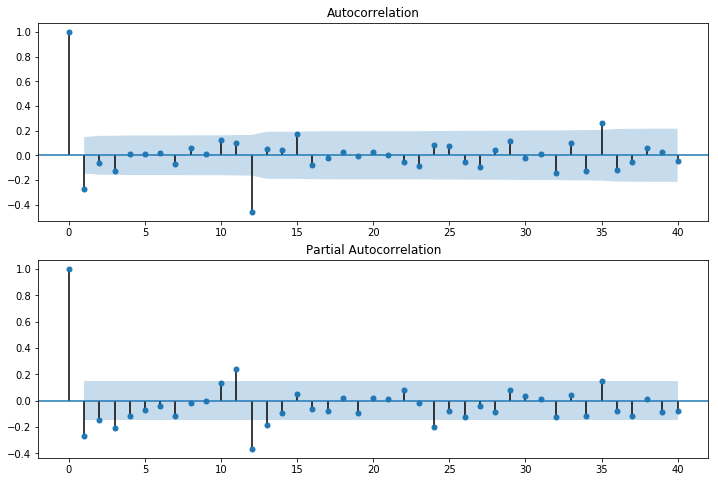

In [145]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [146]:
mod = sm.tsa.statespace.SARIMAX(data_price, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                  lowest_deal_price   No. Observations:                  190
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -1820.537
Date:                            Sat, 17 Mar 2018   AIC                           3645.073
Time:                                    08:05:22   BIC                           3651.568
Sample:                                01-01-2002   HQIC                          3647.704
                                     - 10-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9983      0.037    -26.677      0.000      -1.072      -0.925
sigma2      4.432e+07   8.49e-10   

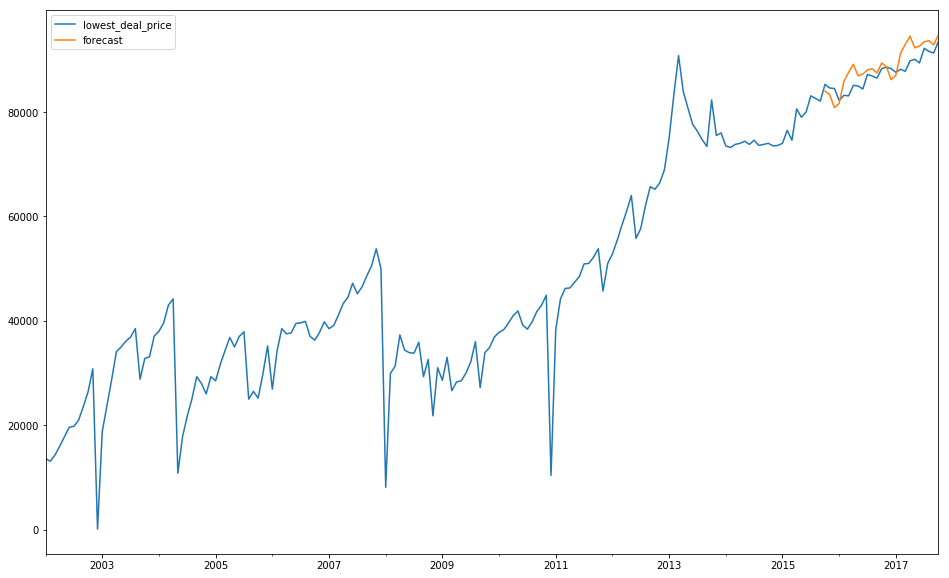

In [147]:
data['forecast'] = results.predict(start = 165, end = 195, dynamic = True)
data[['lowest_deal_price', 'forecast']].plot(figsize=(16,10))

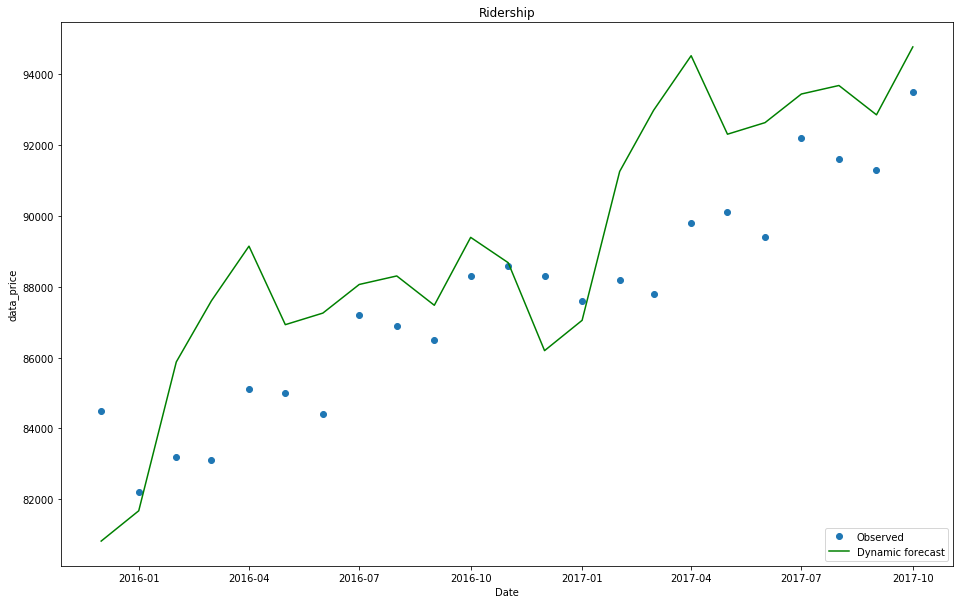

In [148]:
npredict = data_price['2016'].shape[0]
fig, ax = plt.subplots(figsize=(16,10))
npre = 12
ax.set(title='Ridership', xlabel='Date', ylabel='data_price')
ax.plot(data.index[-npredict-npre+1:], data.ix[-npredict-npre+1:, 'lowest_deal_price'], 'o', label='Observed')
ax.plot(data.index[-npredict-npre+1:], data.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')

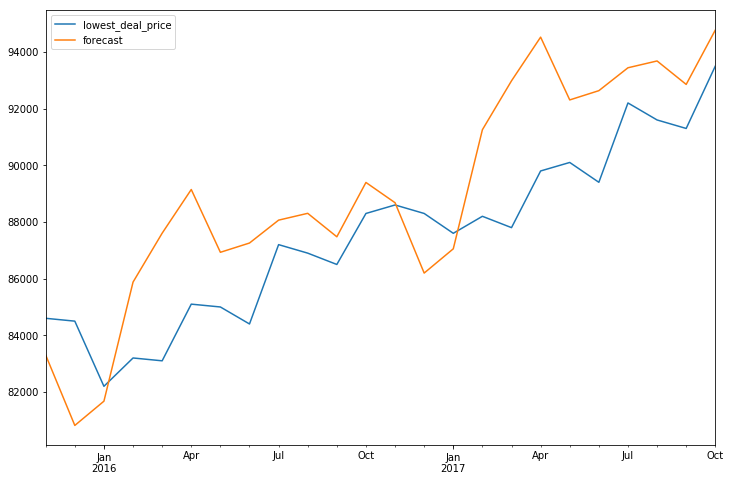

In [150]:
data['forecast'] = results.predict(start = 165, end = 195, dynamic= True)  
data[['lowest_deal_price', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 

In [151]:
# criação da variavel preço e armazenar preço minimo
preco = data_price

preco_log = np.log10(preco)
preco_log.dropna(inplace=True)

preco_log_diff = preco_log.diff(periods=1)
preco_log_diff.dropna(inplace=True)

In [152]:
# Definir os parâmetros p, d e q para tomar qualquer valor entre 0 e 2
p = d = q = range(0, 2)

# Gerar todas as combinações diferentes de trigêmeas p, d e q
pdq = list(itertools.product(p, d, q))

# Gerar todas as diferentes combinações de trigêmeas sazonais, q e q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [153]:
import sys
warnings.filterwarnings("ignore")

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(data_price, order = param, seasonal_order = param_seasonal, enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 model - AIC:3614.125666624862


In [154]:
best_model = sm.tsa.statespace.SARIMAX(data_price, order=(0, 1, 1), seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True, enforce_invertibility=True)
best_results = best_model.fit()

In [155]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                  lowest_deal_price   No. Observations:                  190
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1922.570
Date:                            Sat, 17 Mar 2018   AIC                           3853.139
Time:                                    08:16:09   BIC                           3866.127
Sample:                                01-01-2002   HQIC                          3858.401
                                     - 10-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4523      0.076     -5.975      0.000      -0.601      -0.304
ar.S.L12       0.3041      2.165   

In [156]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [157]:
# imprimir resultados de pred_dynamic_ci
print(pred_dynamic_ci)

            lower lowest_deal_price  upper lowest_deal_price
2016-01-01             71832.208056             96968.580178
2016-02-01             70217.705502             98877.379905
2016-03-01             68591.963772            100386.879566
2016-04-01             67439.232475            102086.835621
2016-05-01             66041.721039            103324.373000
2016-06-01             64836.031412            104579.406592
2016-07-01             63835.507464            105895.887921
2016-08-01             62699.621849            106955.868161
2016-09-01             61630.915131            107979.108958
2016-10-01             60815.909132            109165.622725
2016-11-01             59792.713959            110064.321631
2016-12-01             58866.503278            110989.188084
2017-01-01             57809.820479            112043.798216
2017-02-01             56910.581244            113032.521276
2017-03-01             55979.666492            113928.091533
2017-04-01             5

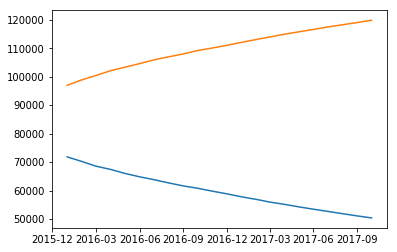

In [158]:
# plot com os valores minimos e maximos previstos para a variavel preço minimo, com esse plot conseguimos ter algumas ideias
# sobre o futuro do preço minimo do modelo delimitando valores maximos e valores minimos no momento da previsão
plt.plot(pred_dynamic_ci)

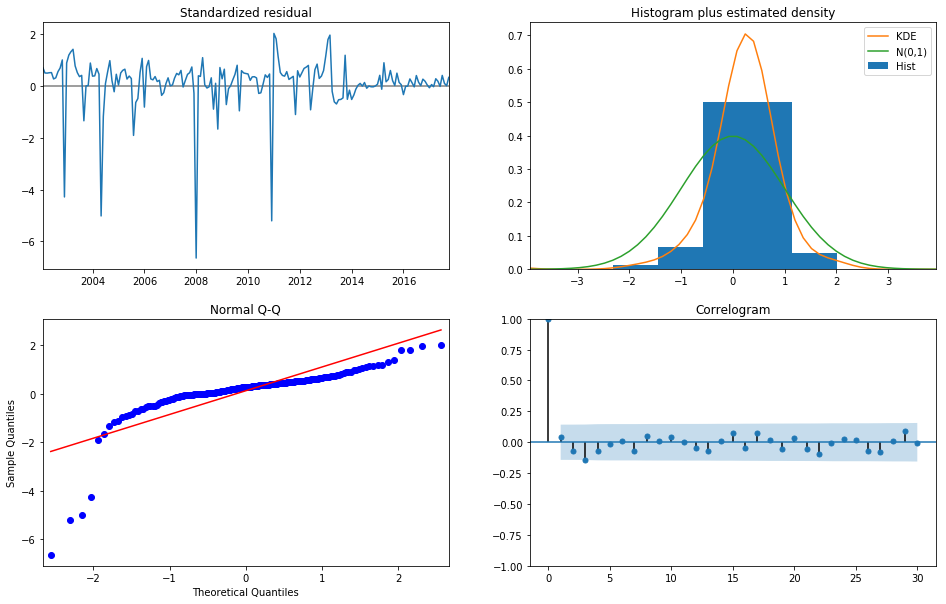

In [159]:
# plot que representa as melhores visualizações para esse dataset
best_results.plot_diagnostics(lags=30, figsize=(16,10))
plt.show()

# Referências:

[1] - Site do Mário Filho. Acesso em: http://mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/

[2] - Kernel do Kaggle com analise de dados. Acesso em: https://www.kaggle.com/bazingasu/data-exploration

[3] - Repositório do GitHub.Acesso em: https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb

[4] - Post do Blog Analyticsvidhya. Acesso em: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

[5] - Post do Blog Ucanalytics. Acesso em:http://ucanalytics.com/blogs/wp-content/uploads/2017/08/ARIMA-TimeSeries-Analysis-of-Tractor-Sales.html

[6] - Repositório do GithHub do Data Science Handbook. Acesso em: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb

[7] - Repositório do Kaggle com analise de dados: https://www.kaggle.com/kentata/time-series-data-exploration

https://www.kaggle.com/bogof666/shanghai-car-license-plate-auction-price/data

https://www.kaggle.com/bazingasu/shanghai-license-plate-bidding-price-prediction/data

http://deeplearningbook.com.br/capitulo-9-a-arquitetura-das-redes-neurais/

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

https://codeburst.io/jupyter-notebook-tricks-for-data-science-that-enhance-your-efficiency-95f98d3adee4

https://towardsdatascience.com/why-you-should-forget-for-loop-for-data-science-code-and-embrace-vectorization-696632622d5f

https://towardsdatascience.com/10-machine-learning-algorithms-you-need-to-know-77fb0055fe0

http://www.cbcity.de/timeseries-decomposition-in-python-with-statsmodels-and-pandas

https://bibliotecadigital.ipb.pt/bitstream/10198/12709/1/Artur%20Jorge%20Ferreira%20da%20Costa%20Dias.pdf

http://www.redalyc.org/pdf/3291/329147536007.pdf

http://www.ceel.eletrica.ufu.br/artigos/ceel2016_artigo094_r01.pdf

https://repositorio.bc.ufg.br/tede/bitstream/tede/7563/5/Disserta%C3%A7%C3%A3o%20-%20Ricardo%20Henrique%20Fonseca%20Alves%20-%202017.pdf

http://ftp.cptec.inpe.br/labren/publ/teses/DISSERTACAO_RICARDO-GUARNIERI.pdf

http://www.confea.org.br/media/contecc2017/eletrica/1_audrnanpdrsg.pdf

http://www.inovarse.org/sites/default/files/T14_0291_5.pdf

http://www.redalyc.org/html/3291/329147536007/

https://repositorio.ufu.br/handle/123456789/14569

https://repositorio.ufsc.br/bitstream/handle/123456789/178026/TCC_Final_Jhuan_Souza.pdf?sequence=1&isAllowed=y

https://www.producaoonline.org.br/rpo/article/view/2542/1596

revistas.ufpr.br/rber/article/download/48431/pdf

https://pt.stackoverflow.com/questions/192098/como-funciona-uma-rede-neural-artificial

https://martin-thoma.com/classification-with-pybrain/

http://conteudo.icmc.usp.br/pessoas/andre/research/neural/

http://www.din.uem.br/ia/neurais/

http://www.cerebromente.org.br/n05/tecnologia/rna.htm

ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ia006_03/topico5_03.pdf

http://www2.dbd.puc-rio.br/pergamum/tesesabertas/0016231_04_cap_05.pdf

https://www.embarcados.com.br/redes-neurais-artificiais-introducao/

https://periodicos.utfpr.edu.br/recit/article/view/4330/Leandro

http://www2.ica.ele.puc-rio.br/Downloads/33/ICA-introdu%C3%A7%C3%A3o%20RNs.pdf

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1982-21702017000100150&lng=pt&tlng=pt

http://www.scielo.br/scielo.php?pid=S1678-86212017000300103&script=sci_arttext

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

https://www.monolitonimbus.com.br/processos-estacionarios/

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

http://www.portalaction.com.br/series-temporais/11-estacionariedade

http://www.icad.puc-rio.br/cfeijo/pdf/revis%C3%A3o%20b%C3%A1sica%20s%C3%A9ries%20temporais_material%20de%20apoio_curso%20teoria%20macroeconomica_PPGE%20UFF.pdf

https://www.ime.unicamp.br/~hlachos/MaterialSeries.pdf

http://www.inf.ufsc.br/~marcelo.menezes.reis/Cap4.pdf

https://www.researchgate.net/publication/229040330_JTIMESAT_uma_ferramenta_para_a_visualizacao_de_series_temporais_de_imagens_de_satelite

http://bdm.unb.br/bitstream/10483/7239/1/2013_JoseRobertoGoncalvesdeRezendeFilho.pdf

https://www.maxwell.vrac.puc-rio.br/16824/16824_4.PDF

https://www.maxwell.vrac.puc-rio.br/24787/24787_4.PDF

http://conteudo.icmc.usp.br/pessoas/ehlers/stemp/stemp.pdf

http://cdsid.org.br/sbpo2015/wp-content/uploads/2015/08/140250.pdf

https://www.marinha.mil.br/spolm/sites/www.marinha.mil.br.spolm/files/101711_0.pdf

https://www.lume.ufrgs.br/bitstream/handle/10183/31034/000782115.pdf?sequence=1

http://www2.ufersa.edu.br/portal/view/uploads/setores/232/TCC%20-%20VALCIANO%20CAMILO%20GURGEL.pdf

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1982-21702017000100150&lng=pt&tlng=pt

http://www.ime.eb.br/arquivos/teses/se4/mec2008/2008Bianca.pdf

http://repositorio.unicamp.br/bitstream/REPOSIP/267746/1/Conti_JoseCarlos_M.pdf

http://www.ctec.ufal.br/professor/cfs/Sul_Sud06%20-%20Series.pdf

http://pdf.blucher.com.br.s3-sa-east-1.amazonaws.com/marineengineeringproceedings/spolm2015/140011.pdf

http://www.portalaction.com.br/series-temporais/15-modelos-para-series-temporais

http://www.scielo.br/scielo.php?pid=S1678-86212017000300103&script=sci_arttext

https://www.researchgate.net/publication/289479535_Previsao_de_energia_eletrica_modelagem_e_uso_de_combinacoes_de_previsoes

https://www.ufrgs.br/sbai17/papers/paper_506.pdf

http://www.scielo.org.co/pdf/eia/n26/en_n26a09.pdf

http://www.sciencedirect.com/science/article/pii/S1877050915015641

http://www.uff.br/engevista/seer/index.php/engevista/article/viewFile/433/236

http://www.ufjf.br/pgmc/files/2011/05/Disserta%C3%A7%C3%A3o-Guilherme-G-Neto-18-08.pdf

http://www.exatas.ufpr.br/portal/degraf_paulo/wp-content/uploads/sites/4/2014/09/EE022-08-08.pdf

http://www.datascienceinstitute.com.br/forecast-de-consumo-de-energia-eletrica/

https://docs.microsoft.com/pt-br/azure/machine-learning/preview/scenario-time-series-forecasting

https://translate.google.com.br/translate?sl=en&tl=pt&js=y&prev=_t&hl=pt-BR&ie=UTF-8&u=http%3A%2F%2Fwww.scielo.br%2Fscielo.php%3Fscript%3Dsci_arttext%26pid%3DS1678-86212017000300103%26lng%3Dpt%26tlng%3Dpt&edit-text=

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1678-86212017000300103&lng=pt&tlng=pt

http://acervo.ufvjm.edu.br/jspui/bitstream/1/1327/1/rodrigo_magalhaes_mota_santos.pdf

http://tede2.pucgoias.edu.br:8080/bitstream/tede/2484/1/Paulo%20Henrique%20Borba%20Florencio.pdf

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.29.4455&rep=rep1&type=pdf

https://gab41.lab41.org/the-10-algorithms-machine-learning-engineers-need-to-know-f4bb63f5b2fa

http://minerandodados.com.br/index.php/2017/05/19/prevendo-precos-de-acoes-da-bolsa-de-valores-com-machine-learning/

https://fga.unb.br/articles/0000/5556/TCC_Hialo_Muniz.pdf

http://www.feis.unesp.br/Home/departamentos/engenhariaeletrica/pos-graduacao/327-dissertacao_ciceromarcelo.pdf

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

http://www.semantix.com.br/10-algoritmos-de-machine-learning/

http://www.scielo.br/scielo.php?pid=S1678-86212017000300103&script=sci_arttext

https://fga.unb.br/articles/0000/7804/TCC_Hialo_Muniz.pdf

http://www.leec.eco.br/downloads/R-tutorial-de-bolso.pdf